# 소비자 데이터 기반 소비 예측 경진대회 첫 번째 베이스라인

이번 대회는 소비자 데이터를 통하여 소비량을 예측하는 대회입니다.

언뜻보면 간단해 보이지만 처음 데이터 분석을 접하시는 분들에게는 어디부터 어떻게 시작해야 하는지 막막하실 겁니다.

## 누구나 할 수 있는 데이터 분석
딥러닝, 머신러닝, 모델, 학습, 회귀분석 .... 다 몰라도 괜찮습니다!

누구나 할 수 있는 방식으로 간단하게 데이터 분석 & 예측을 진행해보겠습니다.

## 패키지 설치
필요한 패키지들을 설치합니다.

In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## 데이터 불러오기

In [79]:
#csv 형식의 training 데이터를 로드합니다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') # 데이터를 불러온 뒤
#데이터 살펴보기 위해 데이터 최상단의 5줄을 표시합니다.
train.head() 

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [80]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

## 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [81]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


이번 데이터는 결측치가 존재하지 않네요!

## 데이터 전처리


### 일자 분리

모델에 수치를 넣고 학습시키기 위해선 글자나 문자를 숫자로 바꿔주는 작업이 필요합니다.

주어진 데이터를 살펴보면 Dt_Customer 문자열(string)로 되어있는 것을 확인하실 수 있습니다.

이를 각각 년도, 월, 일로 나누어 숫자형으로 변환해 보겠습니다.

In [82]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.Dt_Customer:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(train)
    
train['year'] = year
train['month'] = month
train['day'] = day

train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,0,0,0,0,0,0,541,21,1,2013
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,0,0,0,0,0,0,899,24,5,2014
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,0,0,0,0,0,0,901,8,4,2013
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,0,0,0,0,0,0,50,29,3,2014
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,0,0,1,0,0,0,444,10,6,2014


년도, 월, 일이 전부 잘 분리되어 들어간게 보이시나요?

이제 사용할 필요 없는 중복된 Dt_Customer 열을 삭제해주겠습니다.

In [83]:
train = train.drop('Dt_Customer', axis = 1)
train.shape ## (행, 열)

(1108, 24)

### 카테고리형 데이터 인코딩

이제 info() 메소드를 이용하여 데이터의 타입을 살펴보겠습니다.

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Recency              1108 non-null   int64  
 8   NumDealsPurchases    1108 non-null   int64  
 9   NumWebPurchases      1108 non-null   int64  
 10  NumCatalogPurchases  1108 non-null   int64  
 11  NumStorePurchases    1108 non-null   int64  
 12  NumWebVisitsMonth    1108 non-null   int64  
 13  AcceptedCmp3         1108 non-null   int64  
 14  AcceptedCmp4         1108 non-null   int64  
 15  AcceptedCmp5         1108 non-null   i

In [85]:
train = pd.get_dummies(train, columns = ['Education','Marital_Status'])

In [86]:
train

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,1974,46014.0,1,1,21,10,7,1,8,...,1,0,0,0,0,0,0,1,0,0
1,1,1962,76624.0,0,1,68,1,5,10,7,...,0,0,0,0,0,0,1,0,0,0
2,2,1951,75903.0,0,1,50,2,6,6,9,...,0,0,0,0,0,1,0,0,0,0
3,3,1974,18393.0,1,0,2,2,3,0,3,...,0,0,0,0,0,1,0,0,0,0
4,4,1946,64014.0,2,1,56,7,8,2,5,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,1956,46097.0,0,1,11,5,3,1,6,...,0,0,0,0,0,0,0,1,0,0
1104,1104,1986,23477.0,1,0,39,3,3,0,4,...,0,0,0,0,0,1,0,0,0,0
1105,1105,1975,37368.0,1,0,4,1,1,0,2,...,1,0,0,0,0,1,0,0,0,0
1106,1106,1974,53034.0,1,1,30,8,6,1,7,...,0,0,0,0,1,0,0,0,0,0


Education와 Marital_Status가 카테고리형 데이터 이군요!

머신러닝 알고리즘은 문자열 데이터 속성을 입력받지 않으며 모든 데이터는 숫자형으로 표현되어야 합니다.

그래서 문자형 카테고리형 속성은 모두 숫자 값으로 변환/인코딩 되어야 합니다.

 'Label Encoding' 을 통해서 카테고리형을 숫자 값으로 변환해보겠습니다.

Label Encoding이란, 범주형 변수의 문자열을 수치형으로 변환하는 방법 중 하나입니다.

우리 데이터에는 Education와 Marital_Status 피쳐가 문자로 이루어져있기 때문에, 이것을 Label Encoding을 통해 숫자형으로 표현해보겠습니다.

## 변수 및 모델 정의

이제 본격적으로 모델을 설계하기 위해 데이터를 독립변수(X)와 종속변수(y) 로 나누어 줍니다

우리의 목적은 주어진 소비자 데이터를 이용하여 사람들이 얼마나 소비를 하는지 소비량(Target)을 예측하는 것입니다.

그럼 소비 데이터가 X, 소비량이 y가 되겠죠?

In [87]:
X = train.drop(['id', 'target'], axis = 1) #training 데이터에서 피쳐 추출
y = train.target #training 데이터에서 소비량 추출

이렇게 X와 y를 잘 정의해주었습니다.

<br> 

이제 우리는 모델을 만들어야 하는데,   
모델을 만들기 앞서 내가 만들 모델이 유의미한지 알아야 좋은 결론을 도출 할 수 있겠죠?   

<br> 

하지만 단순히 주어진 데이터로 train셋 데이터를 학습시켜서 목표값인 test 셋에 집어 넣어 예측값을 도출하면,   
모델이 적합한지 알 방법이 없습니다.   

<br> 

따라서 train 셋에서 70%를 학습을 시키는데 쓰고, 나머지 30%를 모델이 유의미한지 검증하는데 사용할 것입니다.   
이후 유의미하다면, 실제로 제출할 모델을 만들 때, train 셋 100%를 학습을 시키면 되겠죠?

<br>

자 그럼 train 셋에서 학습시킬 셋 train_data와 검증할 셋 val_data를 만들어 봅시다!

In [88]:
from sklearn.model_selection import train_test_split

data = train.drop('id', axis = 1).copy() #필요없는 id열 삭제
train_data, val_data = train_test_split(data, test_size=0.3) #30프로로 설정
train_data.reset_index(inplace=True) #전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val_data.reset_index(inplace=True)

In [89]:
print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (775, 35)
검증할 val 셋 :  (333, 35)


위의 데이터 모양을 보면, 775개의 데이터를 학습시켜 333개의 데이터로 성능을 검증시킬 것 입니다!

In [90]:
train_data_X = train_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
train_data_y = train_data.target #training 데이터에서 소비량 추출

val_data_X = val_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
val_data_y = val_data.target #training 데이터에서 소비량 추출

단순한 선형회귀 모델로 문제를 해결해보도록 하겠습니다.

sklearn에서 제공하는 선형회귀 모델을 사용하겠습니다.

In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 모델 정의
model.fit(train_data_X, train_data_y) # 학습

LinearRegression()

굉장히 간단하게 학습이 끝났습니다.

모델이 실제로 데이터를 얼마나 잘 맞추는지 확인해볼까요?

In [92]:
import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):

    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    
    return score

y_hat = model.predict(val_data_X) # y예측
print(f'모델 NMAE: {nmae(val_data_y,y_hat)}')

모델 NMAE: 0.2856256538015008


NMAE로 계산하여 0.267가 나왔습니다.

좋은 수치일까요 나쁜 수치일까요?

NMAE 0.267는 대략 예측치와 실제값이 26.7% 정도의 오차율을 보인다는 것을 의미합니다.

어떠신가요 여러분은 만족하시나요?

## 예측값 눈으로 확인하기

0.267라는 숫자만 봐서는 모델이 어떤방식으로 맞췄는지 어디에서 오차가 더 많이 나는지 알 수 없습니다.

모델을 개선시키기 위해선 어느 포인트에서 예측을 하지 못했는지 모델의 약점을 알아야합니다.

그러기 위한 방법중 하나가 바로 오답노트인데요

여러분은 데이콘 제출페이지에 제출하는 방식으로 스코어를 확인할수도, train set의 정확도가 어느정도 나오는지 눈으로 확인할 수도 있습니다.

train set에서 오답노트를 확인하는것은 자칫 overfitting시킬 수 있어 조심해야하는 부분이지만 여러분에게 어느정도 인사이트를 줄 수도 있을겁니다.

그럼 plot을 그려서 확인해 보겠습니다.

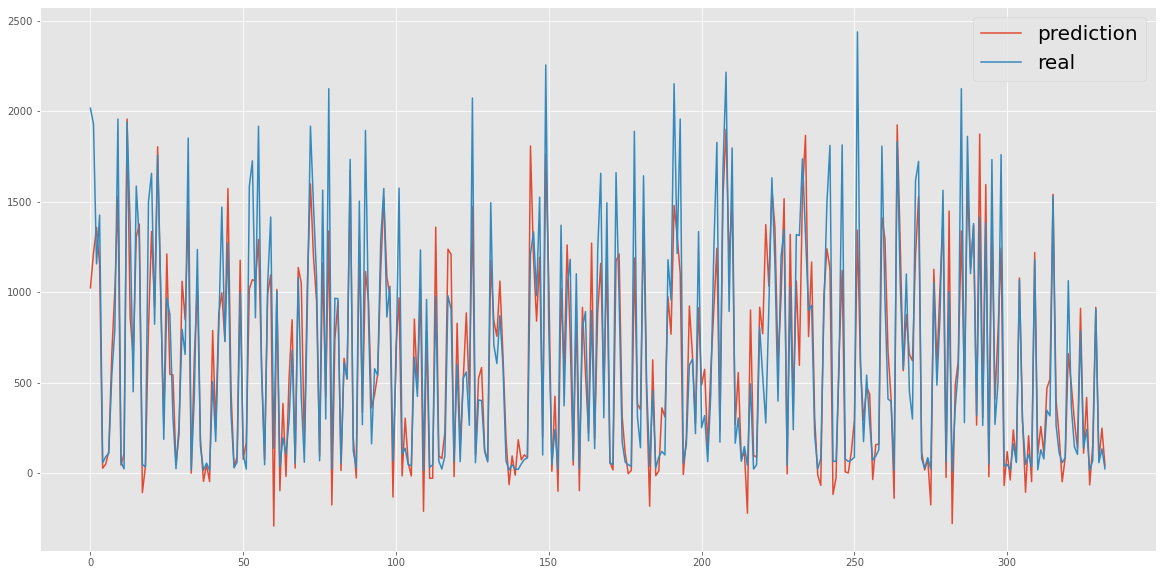

In [93]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(val_data_y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

파란선이 실제 따릉이 소비량, 붉은 선이 우리의 모델이 예측한 값입니다.

여러분이 보기에는 어떠신가요?

우리의 모델이 어느정도 예측을 하고 있는것같나요?

'추세는 따라가고 있는것 같다'정도는 이야기할 수 있을것 같습니다.

## train 셋 + val 셋 100% 활용하는 모델 만들기

이제 검증 셋으로 성능이 유의미한지 확인을 하였다면 데이터를 100% 활용하기 위하여   
검증 셋을 포함한 train 셋을 만들어보겠습니다.

In [94]:
train_X = train.drop(['target', 'id'], axis = 1) #training 데이터에서 피쳐 추출
train_y = train.target #training 데이터에서 소비량 추출

model = LinearRegression() # 모델 정의
model.fit(train_X, train_y) # 학습

LinearRegression()

## 제출
이제 제출을 해보겠습니다.

주어진 test데이터로 예측을 진행한 다음 sample_submission.csv에 예측한 값을 넣어보겠습니다.

앞서 train 셋에서 했던 동일한 전처리 과정을 거치되, data leakage가 발생하지 않도록 주의합니다.

In [95]:
check_missing_col(test) # 결측치 확인

year, month, day = seperate_datetime(test) #날짜 숫자로 분리

test = test.drop('Dt_Customer', axis = 1) #필요없는 열 삭제

#새로운 컬럼을 생성
test['year'] = year 
test['month'] = month
test['day'] = day


test = pd.get_dummies(test, columns = ['Education','Marital_Status'])
test = test.drop(['id'], axis = 1) #training 데이터에서 피쳐 추출

test.head()

결측치가 존재하지 않습니다


,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1979,57537.0,1,0,83,4,4,3,8,4,...,0,0,0,0,0,0,1,0,0,0
1,1955,65748.0,0,1,58,2,2,4,10,1,...,0,0,0,0,0,0,0,1,0,0
2,1984,55434.0,1,0,21,3,5,3,13,4,...,0,0,0,0,0,1,0,0,0,0
3,1960,67716.0,0,1,8,4,7,4,13,5,...,0,0,0,0,0,1,0,0,0,0
4,1976,85606.0,0,1,89,2,6,7,9,3,...,0,0,0,0,0,0,0,1,0,0


전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.

In [96]:
prediction = model.predict(test)
prediction

array([744.11624883, 800.64224113, 861.92359551, ..., 205.5189871 ,
       691.46806085, 361.98385   ])

## Dacon 대회에 제출하기 (Submission)

이제 학습한 모델을 사용하여 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [97]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('./sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [98]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
submission['target'] = prediction

# 데이터가 잘 들어갔는지 확인합니다.
submission.head()

,id,target
0,0,744.116249
1,1,800.642241
2,2,861.923596
3,3,1166.498651
4,4,1483.405747


submission을 csv 파일로 저장합니다.   
index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다.   
정확한 채점을 위해 꼭 index=False를 넣어주세요. 

In [99]:
submission.to_csv("submission_baseline1.csv", index=False)

이렇게 생성된 submission.csv 파일을 데이콘 대회 페이지에 업로드 & 제출하여 결과를 확인해보세요!

문제를 해결하기 위한 여러분의 방법을 코드 공유 게시판에 공유해주세요

좋아요와 댓글을 합산하여 가장 높은 점수를 얻으신 분께 데이콘 후드가 제공됩니다!